In [25]:
from util import *
import matplotlib.pyplot as plt
from skimage.feature import register_translation
from scipy.ndimage import fourier_shift

%matplotlib inline

### Load images 

In [5]:
SKPM17 = load_ibw('.\..\Data\SKPMcAFM_set2\MAPIFilm12SKPM_0017.ibw')
cAFM04 = load_ibw('.\..\Data\SKPMcAFM_set2\MAPIFilm12cAFM_0004.ibw')

SKPMtopo = SKPM17[:,:,0]
cAFMtopo = cAFM04[:,:,0]


### Display topographies to be aligned

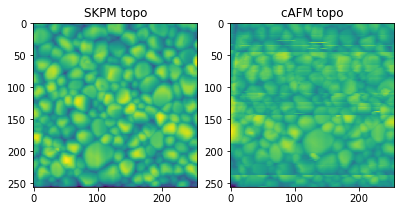

In [24]:
fig = plt.figure(figsize=(10, 20))
ax1 = plt.subplot(1, 3, 1, adjustable='box-forced')
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1, adjustable='box-forced')

ax1.imshow(SKPMtopo)
ax1. set_title('SKPM topo')
ax2.imshow(cAFMtopo)
ax2.set_title('cAFM topo')

### Apply guess to cAFM shift

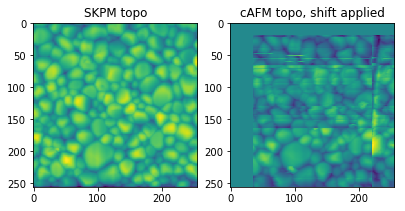

In [62]:
guess = (20, -35)
cAFMshift =  fourier_shift(np.fft.fftn(cAFMtopo), guess)
cAFMshift = np.fft.ifftn(cAFMshift)

#if guess[0] is + then [:guess[0],], otherwise, it is [guess[0]:,...]

cAFMshift[:guess[0]] = 0
cAFMshift[:,:-guess[1]] = 0
fig = plt.figure(figsize=(10, 20))
ax1 = plt.subplot(1, 3, 1, adjustable='box-forced')
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1, adjustable='box-forced')

ax1.imshow(SKPMtopo)
ax1. set_title('SKPM topo')
ax2.imshow(cAFMshift.real)
ax2.set_title('cAFM topo, shift applied')

In [63]:
shift, error, diffphase = feature.register_translation(SKPMtopo, cAFMshift)



In [64]:
shift

array([ 0., -8.])